# 5. Capstone Project: Exploratory Data Analysis

***

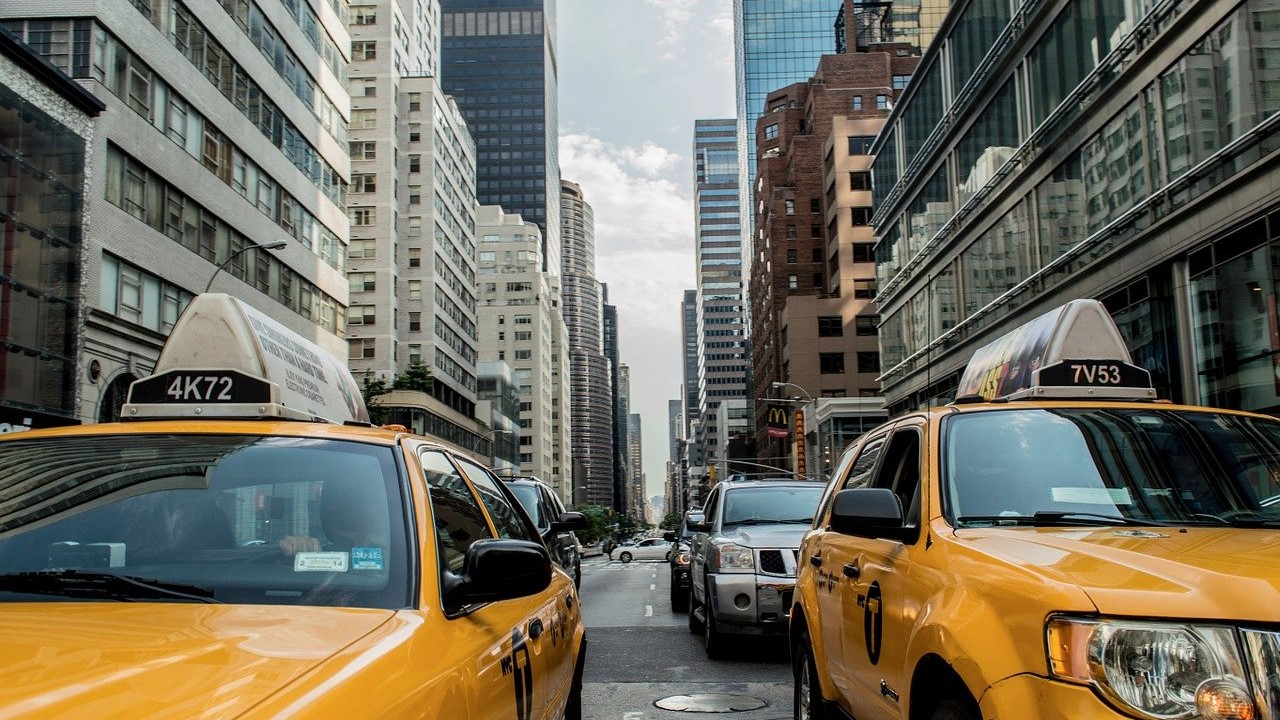

##  Goals

### Project:
Find out where and when traffic congestion is highest and lowest in New York City. Then build different machine learning models that can predict cab travel times in New York City, compare their performance, and explore the potential of additional features such as weather forecasts and holidays to improve the models' predictive performance.

### Section:


## Data
### External Datasets:
- Weather Forecast: The 2018 NYC weather forecast was collected from the [National Weather Service Forecast Office](https://w2.weather.gov/climate/index.php?wfo=okx) website. Daily measurements were taken from January to December 2018 in Central Park. These measures are given in imperial units and include daily minimum and maximum temperatures, precipitations, snowfall, and snow depth.

- Holidays: The 2018 NYC holidays list was collected from the [Office Holiday](https://www.officeholidays.com/countries/usa/new-york/2021) website. The dataset contains the name, date, and type of holidays for New York.

- Taxi Zones: The NYC Taxi Zones dataset was collected from the [NYC Open Data](https://data.cityofnewyork.us/Transportation/NYC-Taxi-Zones/d3c5-ddgc)website. It contains the pickup and drop-off zones (Location IDs) for the Yellow, Green, and FHV Trip Records. The taxi zones are based on the NYC Department of City Planning’s Neighborhood.

### Primary Datasets:

- Taxi Trips: The 2018 NYC Taxi Trip dataset was collected from the [Google Big Query](https://console.cloud.google.com/marketplace/product/city-of-new-york/nyc-tlc-trips?project=jovial-monument-300209&folder=&organizationId=) platform. The dataset contains more than 100'000'000 Yellow Taxi Trip records for 2018 and contains an extensive amount of variables including the pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

***
## Table of Content:

    1. Data Preparation
        1.1 External datasets
            1.1.1 Weather Forecast Dataset
            1.1.2 Holidays Dataset
            1.1.3 Taxi Zones Dataset
        1.2 Primary Dataset
            1.2.1 Taxi Trips Dataset
    2. Exploratory Data Analysis
    3. Machine Learning Models

    

***
## Python Libraries and Magic commands Import

In [1]:
# Import python core libraries
import itertools

# Import data processing libraries
import numpy as np
import pandas as pd

# Import Visualization librairies
import seaborn as sns
import matplotlib.pyplot as plt
import contextily as ctx

# Import machine learning libraries
from sklearn.model_selection import train_test_split

In [2]:
# Set up magic commands
%matplotlib inline
%config Completer.use_jedi = False

***
## Data Import

In [3]:
# Import the train dataset
train_df = pd.read_pickle(r'data/processed/train_df.pickle')

# Import the test dataset
test_df = pd.read_pickle(r'data/processed/test_df.pickle')

# Import the zones dataset
zones_df = pd.read_pickle(r'data/processed/zones.pickle')

***
## Functions import

In [4]:
# Define a function that transform column headers to titles
def to_title(data, sep="_"):
    return [s.replace(sep, " ").title() for s in data]

In [5]:
# Define a function that display a heatmap
def plot_heatmap(data, xticks, yticks, xlabel, ylabel, figsize=(20, 5)):
    # Create a figure with one column and row
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)

    # Generate the plot
    ax.imshow(data, origin="lower", aspect="auto")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.yaxis.set_ticks_position("none")
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.set_xlim(1)
    ax.grid()

    # Adjust the padding between and around subplots
    fig.tight_layout(pad=0.5, w_pad=0.5)

    # Display the figure
    plt.show()

In [6]:
# Define a function that display individual barplot
def plot_lineplot(
    data, x_var, y_var, labels, xlabel, ylabel, figsize=(20, 5), palette="Set2"
):
    # Create a figure with one column and row
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)

    # Generate the plot
    ax = sns.lineplot(x=x_var, y=y_var, hue=labels, data=data, palette=palette)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.yaxis.set_ticks_position("none")
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.grid()

    # Adjust the padding between and around subplots
    fig.tight_layout(pad=0.5, w_pad=0.5)

    # Display the figure
    plt.show()

In [7]:
def plot_clockhist(
    data,
    columns,
    colnames,
    title,
    ylim,
    yticks,
    yticklabels,
    nrows=1,
    ncols=1,
    palette="Set2",
):

    # Get the color palette
    cpal = itertools.cycle(sns.color_palette(palette))

    # Create a figure with n columns and rows
    fig, axes = plt.subplots(
        ncols=ncols,
        nrows=nrows,
        figsize=(5 * ncols, 5 * nrows),
        subplot_kw=dict(projection="polar"),
    )

    # Flatten axes for 2D figures
    if ncols > 1 and nrows > 1:
        axes = axes.ravel()

    # Disable all axes
    for ax in axes:
        ax.set_axis_off()

    # Define theta for 24 hours
    theta = np.linspace(0, 2 * np.pi, 24, endpoint=False)

    # Define the width of each bin
    width = np.divide(np.multiply(2, np.pi), 24)

    # Generate the plots
    for ax, col, colname, color in zip(axes, columns, colnames, cpal):
        ax.bar(
            theta,
            data[col],
            width=width,
            align="edge",
            linewidth=0.25,
            color=color,
            edgecolor="dimgrey",
        )
        ax.set_theta_direction(-1)
        ax.set_theta_zero_location("N")
        ax.set_ylim(0, ylim)
        ax.set_xticks(np.linspace(0, 2 * np.pi, 8, endpoint=False))
        ax.set_yticks(yticks)
        ax.set_xticklabels(
            [f"{x}:00" for x in np.arange(0, 24, 3)], rotation="vertical"
        )
        ax.set_yticklabels(yticklabels, rotation="vertical")
        ax.set_title(colname)
        ax.set_axis_on()

    # Adjust the padding between and around subplots
    fig.tight_layout(pad=0.5, w_pad=0.5)
    
    # Adding a title to the plot
    plt.suptitle(title, y=1.10, fontsize=16)
    
    # Display the plot
    plt.show()

In [33]:
def plot_map(data, columns, colnames, nrows=1, ncols=1, legend=True, figsize=(20, 5)):
    # Creat a figure with n rows and one columns
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

    # Get the min from selected columns in the data frame
    vmin = np.min([data[c].min() for c in columns])

    # Get the max from selected columns in the data frame
    vmax = np.max([data[c].max() for c in columns])
    
    # Flatten axes for 2D figures
    if ncols > 1 and nrows > 1:
        axes = axes.ravel()
        
    # Disable all axes
    for ax in axes:
        ax.set_axis_off()

    # Generate the plots
    for ax, col, colname in zip(axes, columns, colnames):
        data.plot(
            column=col,
            ax=ax,
            alpha=0.33,
            cmap="hot",
            edgecolor="k",
            linewidth=0.25,
            legend=legend,
            legend_kwds={"shrink": 0.66},
            vmin=vmin,
            vmax=vmax,
        )
        ax.set_title(colname, fontsize=18)


        # Add a base map of New York City
        ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

    # Adjust the padding between and around subplots
    fig.tight_layout(pad=0.5, w_pad=0.5)

    # Display the plot
    plt.show()

***

## 2. Exploratory Data Analysis
### Goal:
Explore a subset (10%) of the 2018 NYC yellow taxi trip dataset dataset and perform 
### Code:

In [ ]:
train_df.columns

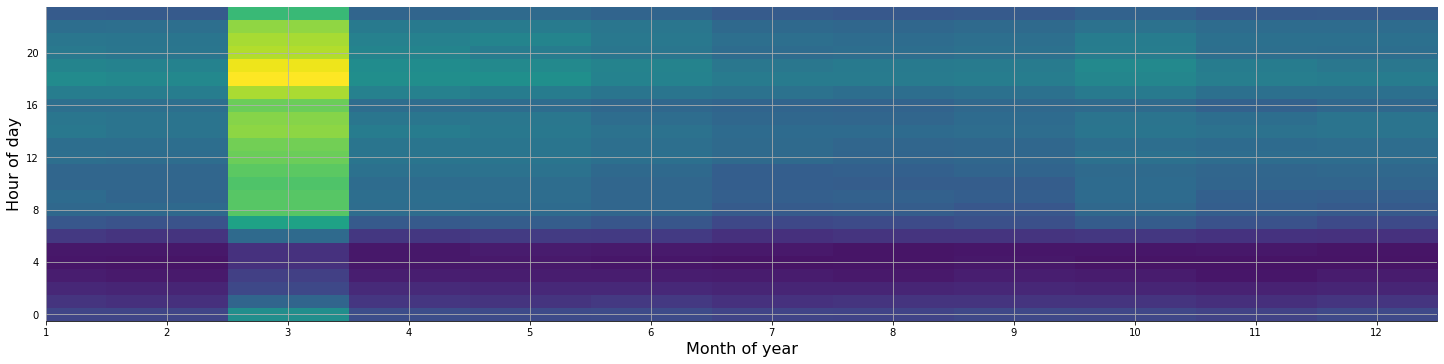

In [10]:
# Aggregate taxi rides by month
monthly_rides = (
    train_df.groupby(["pickup_month", "pickup_hour"])
    .size()
    .to_frame("count")
    .reset_index()
)

# Pivot the monthly taxi rides data frame
monthly_rides_pvt = monthly_rides.pivot(
    index="pickup_hour", columns="pickup_month", values="count"
).reset_index()

# Display the heatmap
plot_heatmap(
    monthly_rides_pvt,
    xticks=np.arange(1, 13, 1),
    yticks=np.arange(0, 24, 4),
    xlabel="Month of year",
    ylabel="Hour of day",
)

**Observations:**

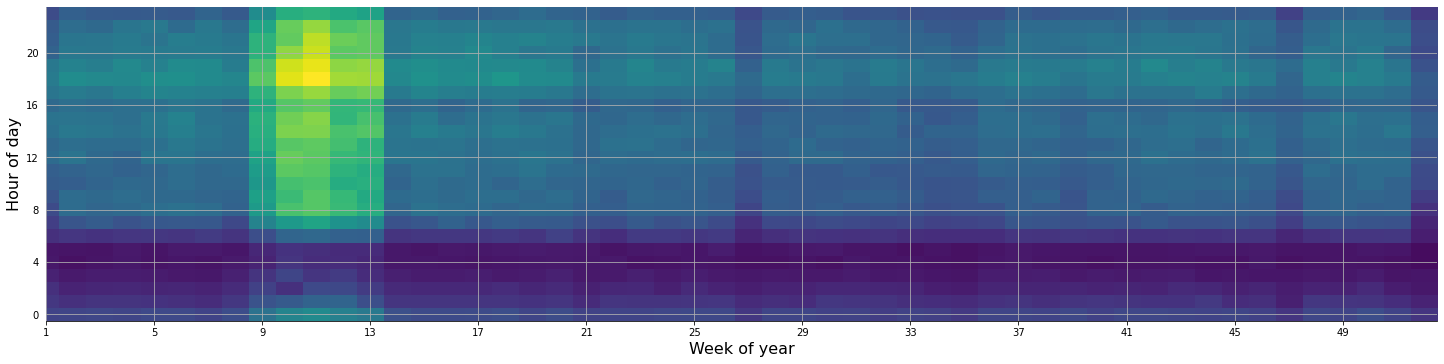

In [11]:
# Aggregate taxi rides by week
weekly_rides = (
    train_df.groupby(["pickup_week", "pickup_hour"])
    .size()
    .to_frame("count")
    .reset_index()
)

# Pivot the weekly taxi rides data frame
weekly_rides_pvt = weekly_rides.pivot(
    index="pickup_hour", columns="pickup_week", values="count"
).reset_index()

# Display the heatmap
plot_heatmap(
    weekly_rides_pvt,
    xticks=np.arange(1, 53, 4),
    yticks=np.arange(0, 24, 4),
    xlabel="Week of year",
    ylabel="Hour of day",
)

**Observations:**

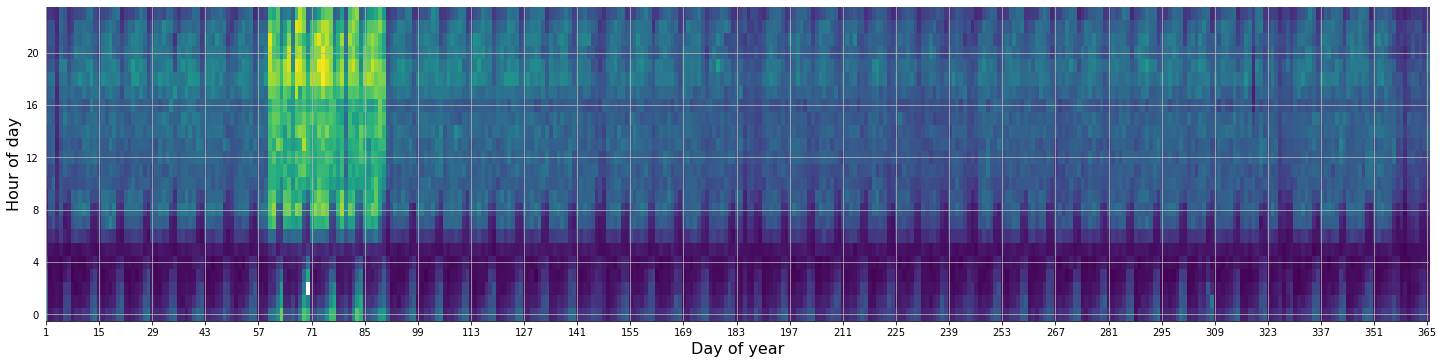

In [12]:
# Aggregate taxi rides by day
daily_rides = (
    train_df.groupby(["pickup_yearday", "pickup_hour"])
    .size()
    .to_frame("count")
    .reset_index()
)

# Pivot the daily taxi rides data frame
daily_rides_pvt = daily_rides.pivot(
    index="pickup_hour", columns="pickup_yearday", values="count"
).reset_index()

# Display the heatmap
plot_heatmap(
    daily_rides_pvt,
    xticks=np.arange(1, 366, 14),
    yticks=np.arange(0, 24, 4),
    xlabel="Day of year",
    ylabel="Hour of day",
)

**Observations:**

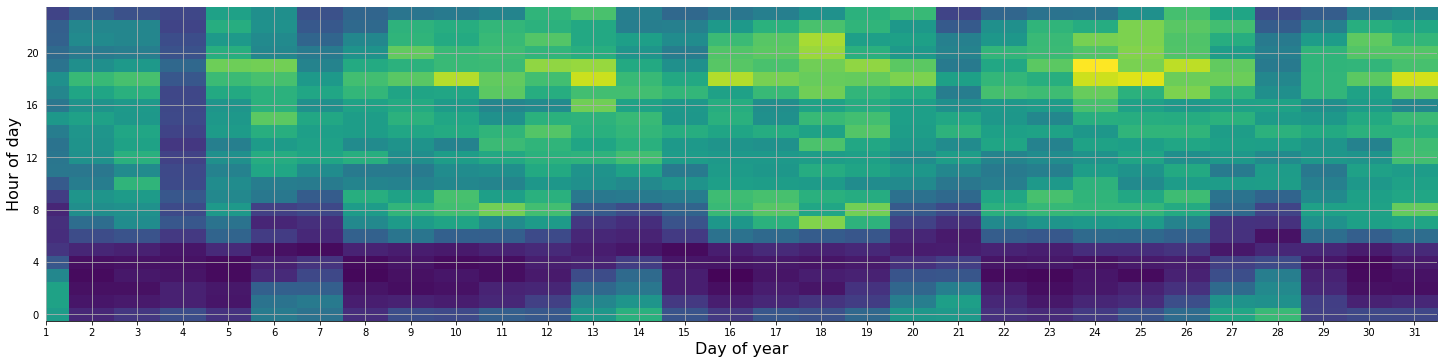

In [13]:
# Display the heatmap for the first 31 days of the year
plot_heatmap(
    daily_rides_pvt.iloc[:, 0:32],
    xticks=np.arange(1, 32, 1),
    yticks=np.arange(0, 24, 4),
    xlabel="Day of year",
    ylabel="Hour of day",
)

**Observations:**

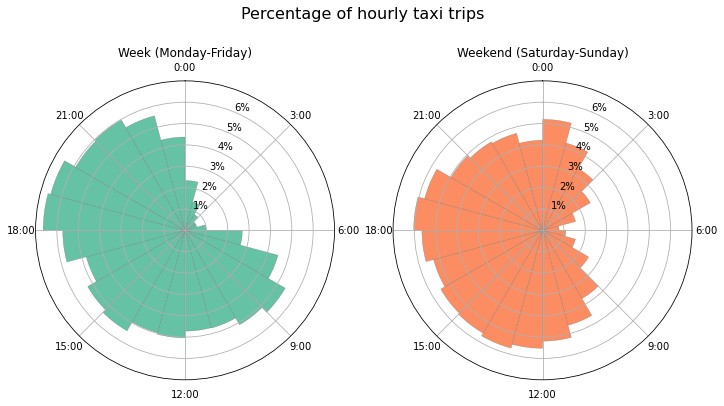

In [14]:
#
hourly_rides = (
    train_df.groupby(["pickup_weekday_type", "pickup_hour"])
    .size()
    .to_frame("count")
    .reset_index()
)

#
hourly_rides_week = hourly_rides.loc[
    hourly_rides["pickup_weekday_type"] == 0, ["pickup_hour", "count"]
]

#
hourly_rides_weekend = hourly_rides.loc[
    hourly_rides["pickup_weekday_type"] == 1, ["pickup_hour", "count"]
]

#
hourly_rides_week["percent"] = (
    np.divide(hourly_rides_week["count"], hourly_rides_week["count"].sum()) * 100
)

#
hourly_rides_weekend["percent"] = (
    np.divide(hourly_rides_weekend["count"], hourly_rides_weekend["count"].sum()) * 100
)

#
hourly_ride_weektype_df = pd.DataFrame(
    {
        "hourly_rides_week": hourly_rides_week["percent"].to_list(),
        "hourly_rides_weekend": hourly_rides_weekend["percent"].to_list(),
    }
)

# Display scatterplot of numerical columns
plot_clockhist(
    hourly_ride_weektype_df,
    columns=["hourly_rides_week", "hourly_rides_weekend"],
    colnames=[
        "Week (Monday-Friday)",
        "Weekend (Saturday-Sunday)",
    ],
    title="Percentage of hourly taxi trips",
    ylim=7.0,
    yticks=np.arange(1, 7, 1),
    yticklabels=[f"{y}%" for y in np.arange(1, 7, 1)],
    ncols=2,
)

In [15]:
#
daily_hourly_rides = (
    train_df.groupby(["pickup_weekday", "pickup_yearday", "pickup_hour"])
    .size()
    .to_frame("count")
    .reset_index()
)

#
hourly_avg_rides = (
    daily_hourly_rides.groupby(["pickup_weekday", "pickup_hour"])
    .agg(mean=("count", "mean"))
    .reset_index()
)

#
hourly_avg_rides["pickup_weekday"] = hourly_avg_rides["pickup_weekday"].map(
    {
        0: "Monday",
        1: "Tuesday",
        2: "Wednesday",
        3: "Thursday",
        4: "Friday",
        5: "Saturday",
        6: "Sunday",
    }
)


#
hourly_avg_rides_pvt = hourly_avg_rides.pivot(
    index="pickup_hour", columns="pickup_weekday", values="mean"
).reset_index()

# Display the first five rows of the data frame
hourly_avg_rides_pvt.head()

pickup_weekday  pickup_hour     Friday     Monday    Saturday      Sunday  \
0                         0  81.788462  37.622642  114.653846  113.403846   
1                         1  51.076923  23.358491   91.153846   94.596154   
2                         2  32.326923  15.981132   71.807692   76.196078   
3                         3  20.288462  12.226415   54.000000   59.384615   
4                         4  17.653846  12.396226   32.692308   37.615385   

pickup_weekday   Thursday    Tuesday  Wednesday  
0               61.576923  40.211538  51.673077  
1               34.269231  22.211538  29.000000  
2               21.403846  12.673077  17.576923  
3               13.730769   8.673077  11.826923  
4               13.846154  10.615385  12.153846

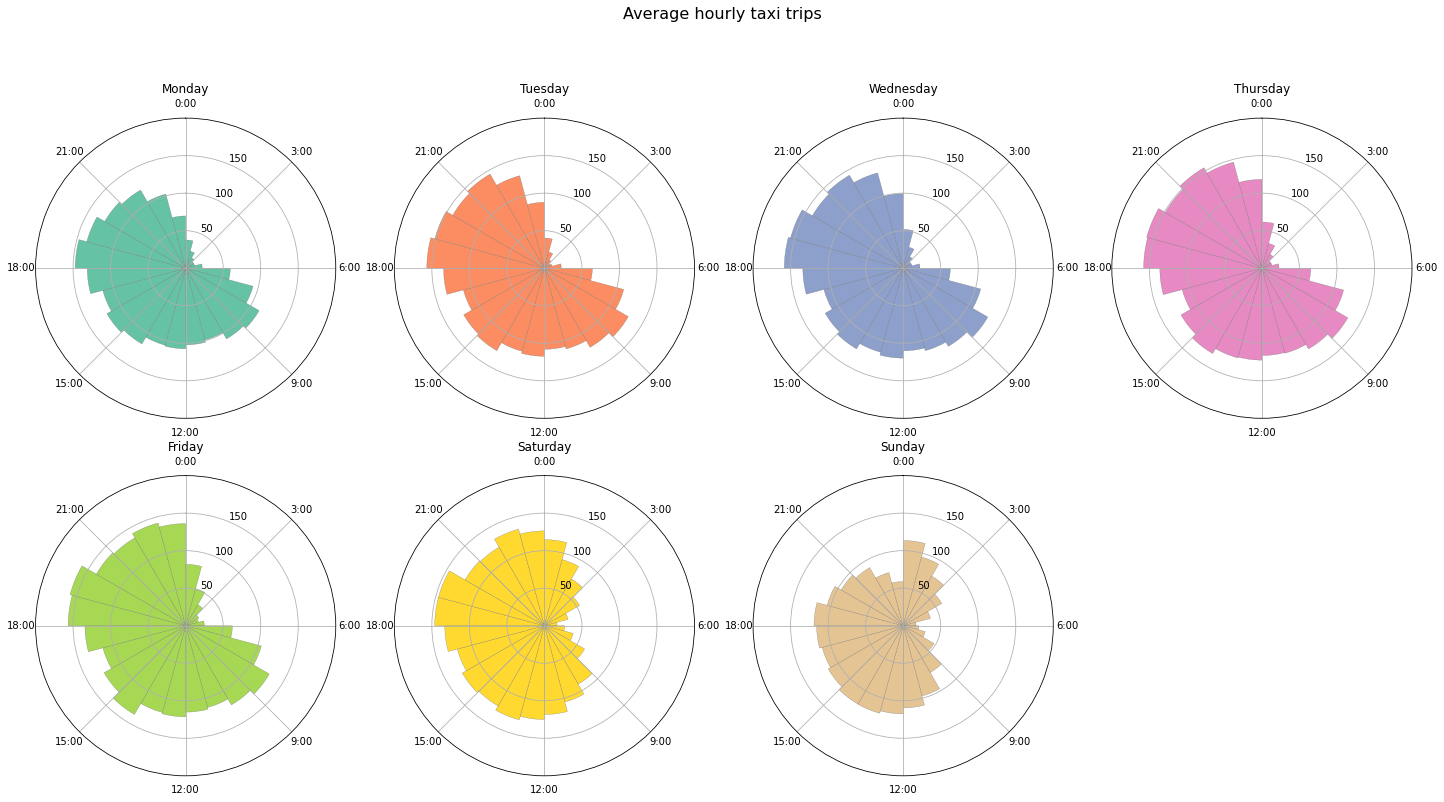

In [16]:
#
weekdays = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]

#
plot_clockhist(
    hourly_avg_rides_pvt,
    columns=weekdays,
    colnames=weekdays,
    title="Average hourly taxi trips",
    ylim=200,
    yticks=np.arange(50, 200, 50),
    yticklabels=[f"{y}" for y in np.arange(50, 200, 50)],
    ncols=4,
    nrows=2,
)

**Observations:** same pattern between week and weekend but less rides on sunday

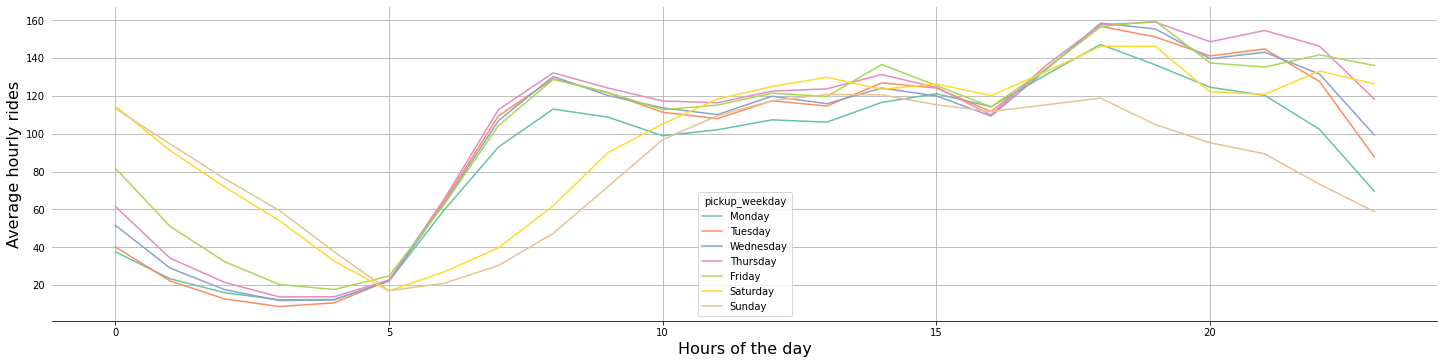

In [17]:
# Display a
plot_lineplot(
    hourly_avg_rides,
    x_var="pickup_hour",
    y_var="mean",
    labels="pickup_weekday",
    xlabel="Hours of the day",
    ylabel="Average hourly rides",
)

**Observations:** More taxi ride doesnt mean longer trip duration

In [18]:
# Group taxi rides by week days and hours
# Compute the mean of trip distrances and durations
hourly_rides_avg = (
    train_df.groupby(["pickup_weekday", "pickup_hour"])
    .agg({"trip_distance": np.mean, "trip_duration": np.mean})
    .reset_index()
)

# Compute the average trip speed
hourly_rides_avg["trip_speed"] = np.divide(
    hourly_rides_avg["trip_distance"], np.divide(hourly_rides_avg["trip_duration"], 60)
)


# Map numerical values to week days
hourly_rides_avg["pickup_weekday"] = hourly_rides_avg["pickup_weekday"].map(
    {
        0: "Monday",
        1: "Tuesday",
        2: "Wednesday",
        3: "Thursday",
        4: "Friday",
        5: "Saturday",
        6: "Sunday",
    }
)

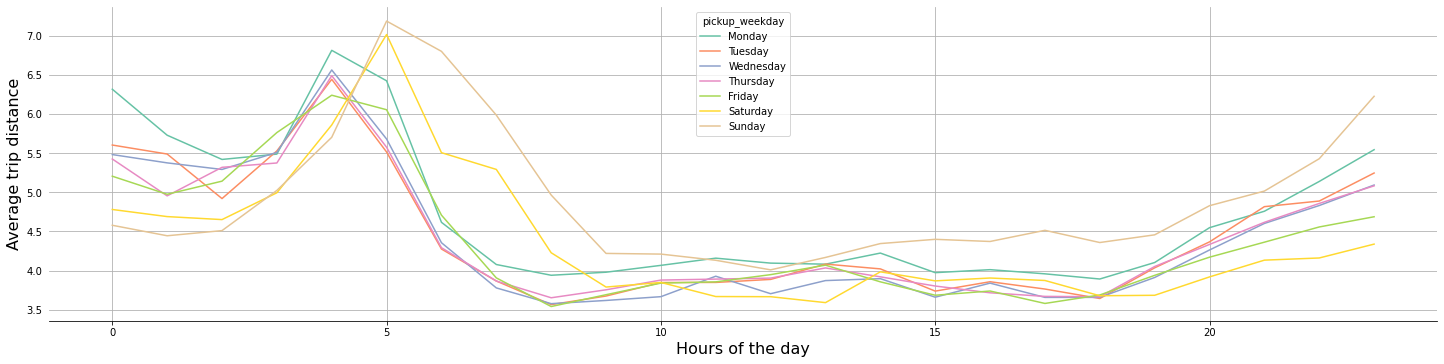

In [19]:
# Display a
plot_lineplot(
    hourly_rides_avg,
    x_var="pickup_hour",
    y_var="trip_distance",
    labels="pickup_weekday",
    xlabel="Hours of the day",
    ylabel="Average trip distance"
)

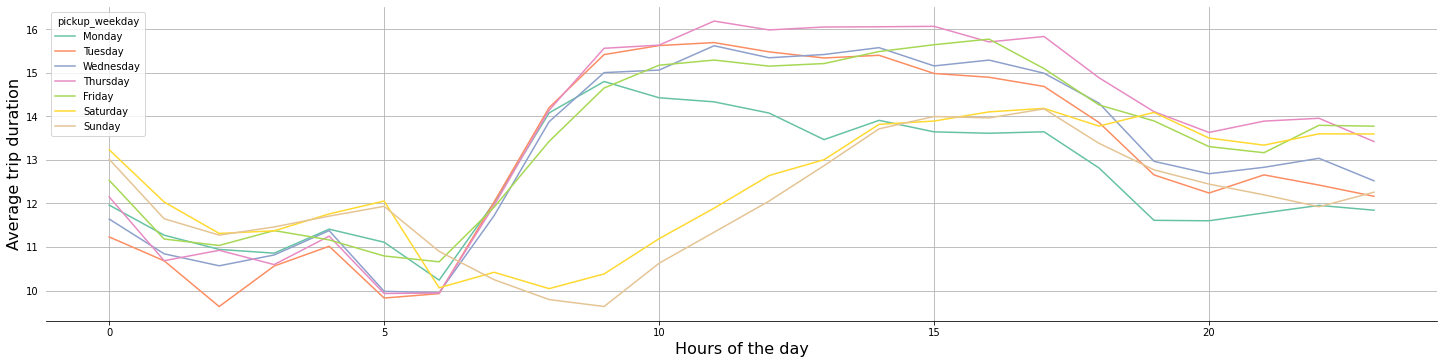

In [20]:
# Display a
plot_lineplot(
    hourly_rides_avg,
    x_var="pickup_hour",
    y_var="trip_duration",
    labels="pickup_weekday",
    xlabel="Hours of the day",
    ylabel="Average trip duration"
)

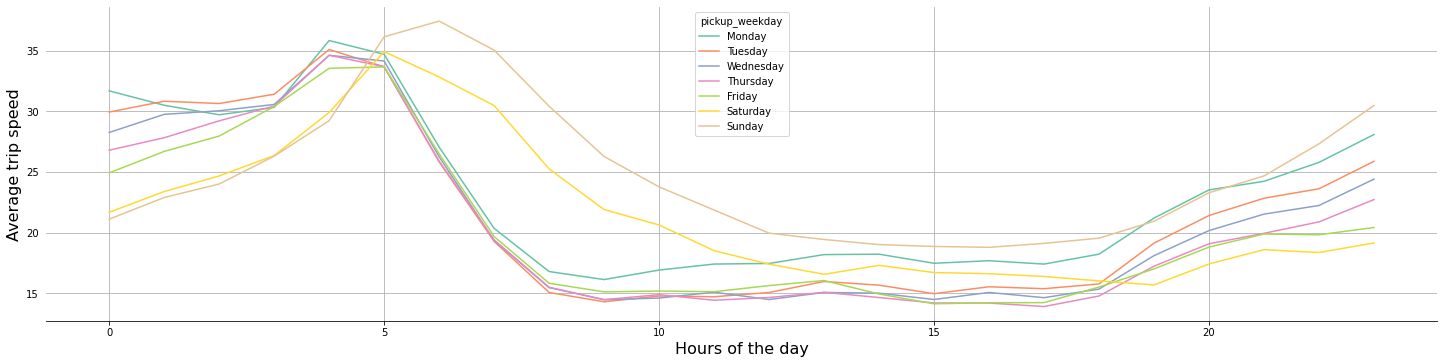

In [21]:
# Display a
plot_lineplot(
    hourly_rides_avg,
    x_var="pickup_hour",
    y_var="trip_speed",
    labels="pickup_weekday",
    xlabel="Hours of the day",
    ylabel="Average trip speed"
)

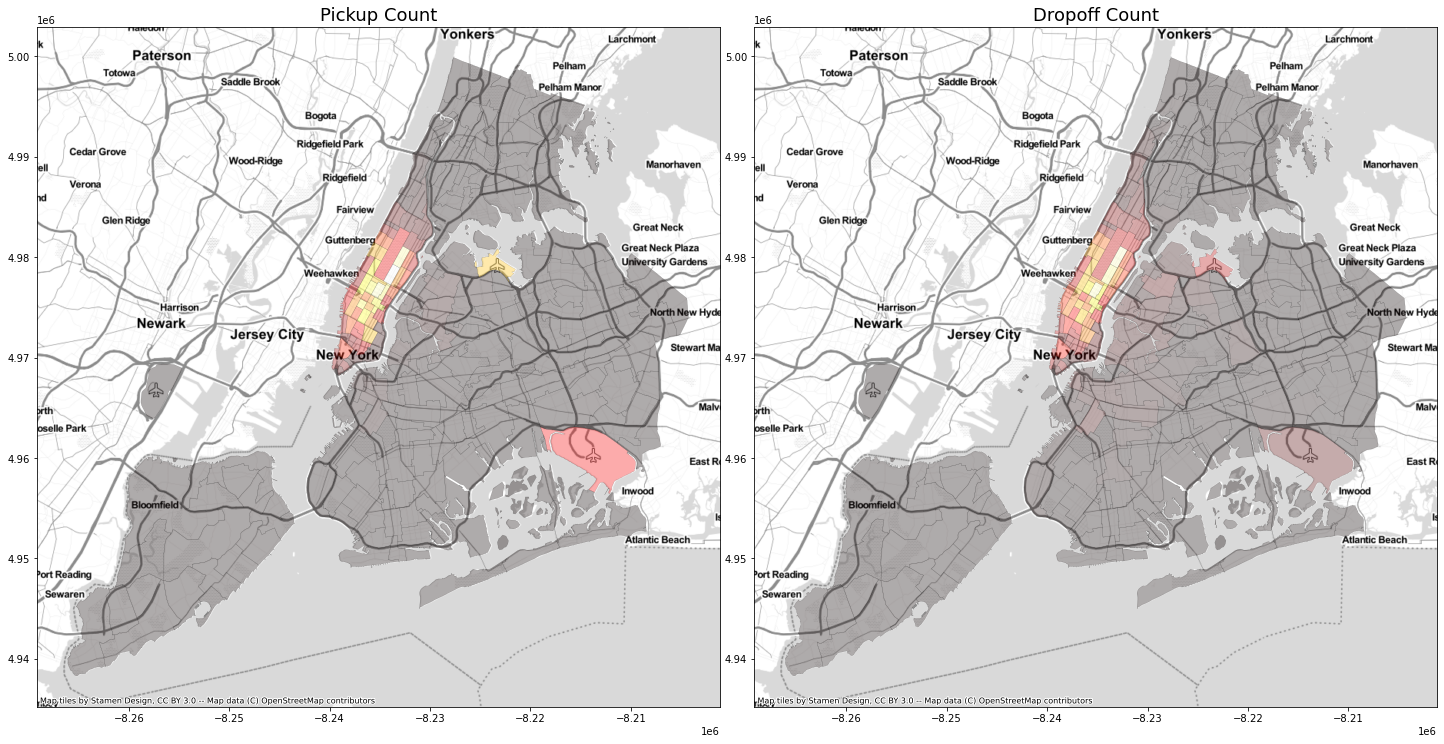

In [22]:
#
total_pickup_count = (
    train_df.groupby(["pickup_location_id"]).size().to_frame("pickup_all").reset_index()
).rename(columns={"pickup_location_id": "LocationID"})

#
total_dropoff_count = (
    train_df.groupby(["dropoff_location_id"])
    .size()
    .to_frame("dropoff_all")
    .reset_index()
).rename(columns={"dropoff_location_id": "LocationID"})

#
zones_summary_df = pd.merge(zones_df, total_pickup_count, how="left", on="LocationID")

#
zones_summary_df = pd.merge(
    zones_summary_df, total_dropoff_count, how="left", on="LocationID"
)

#
zones_summary_df.fillna(0, inplace=True)

#
plot_map(
    zones_summary_df,
    ["pickup_all", "dropoff_all"],
    ["Pickup Count", "Dropoff Count"],
    ncols=2,
    legend=None,
    figsize=(20, 10),
)

In [23]:
#
daily_pickup_count = (
    train_df.groupby(["pickup_location_id", "pickup_weekday", "pickup_yearday"])
    .size()
    .to_frame("count")
    .reset_index()
)

#
daily_pickup_mean = (
    daily_pickup_count.groupby(["pickup_location_id", "pickup_weekday"])
    .agg(mean=("count", "mean"))
    .reset_index()
)

#
daily_pickup_mean["pickup_weekday"] = daily_pickup_mean["pickup_weekday"].map(
    {
        0: "pickup_monday",
        1: "pickup_tuesday",
        2: "pickup_wednesday",
        3: "pickup_thursday",
        4: "pickup_friday",
        5: "pickup_saturday",
        6: "pickup_sunday",
    }
)

#
daily_pickup_mean = daily_pickup_mean.pivot(
    index="pickup_location_id", columns="pickup_weekday", values="mean"
).reset_index()

#
daily_pickup_mean = daily_pickup_mean.rename(
    columns={"pickup_location_id": "LocationID"}
)

#
zones_summary_df = pd.merge(
    zones_summary_df, daily_pickup_mean, how="left", on="LocationID"
)

#
zones_summary_df.fillna(0, inplace=True)

zones_summary_df.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((-8258175.509 4967457.200, -8258179.5...   
1         Queens  MULTIPOLYGON (((-8217980.649 4959237.189, -821...   
2          Bronx  POLYGON ((-8220713.532 4993383.076, -8220638.4...   
3      Manhattan  POLYGON ((-8234500.209 4971984.014, -8234502.1...   
4  Staten Island  POLYGON ((-8257036.153 4948033.072, -8256954.6...   

   pickup_all  dropoff_all  pickup_friday  pickup_monday  pickup_saturday  \
0         0.0          4.0           0.00       0.000000              0.0   
1         0.0          1.0           0.00       0.000000              0.0   
2         7.0         36.0           1.00       0.000000              1.5   
3      1761.0       4012.0           5.52       3.588235              8.0   
4         0.0          0.0           0.00       0.000000              0.0   

   pickup_sunday  pickup_thursday  pickup_tuesday  pickup_wednesday  
0           0.00         0.000000        0.000000          0.000000  
1           0.00         0.000000        0.000000          0.000000  
2           0.00         1.000000        0.000000          1.000000  
3           5.75         4.254902        3.235294          4.019608  
4           0.00         0.000000        0.000000          0.000000

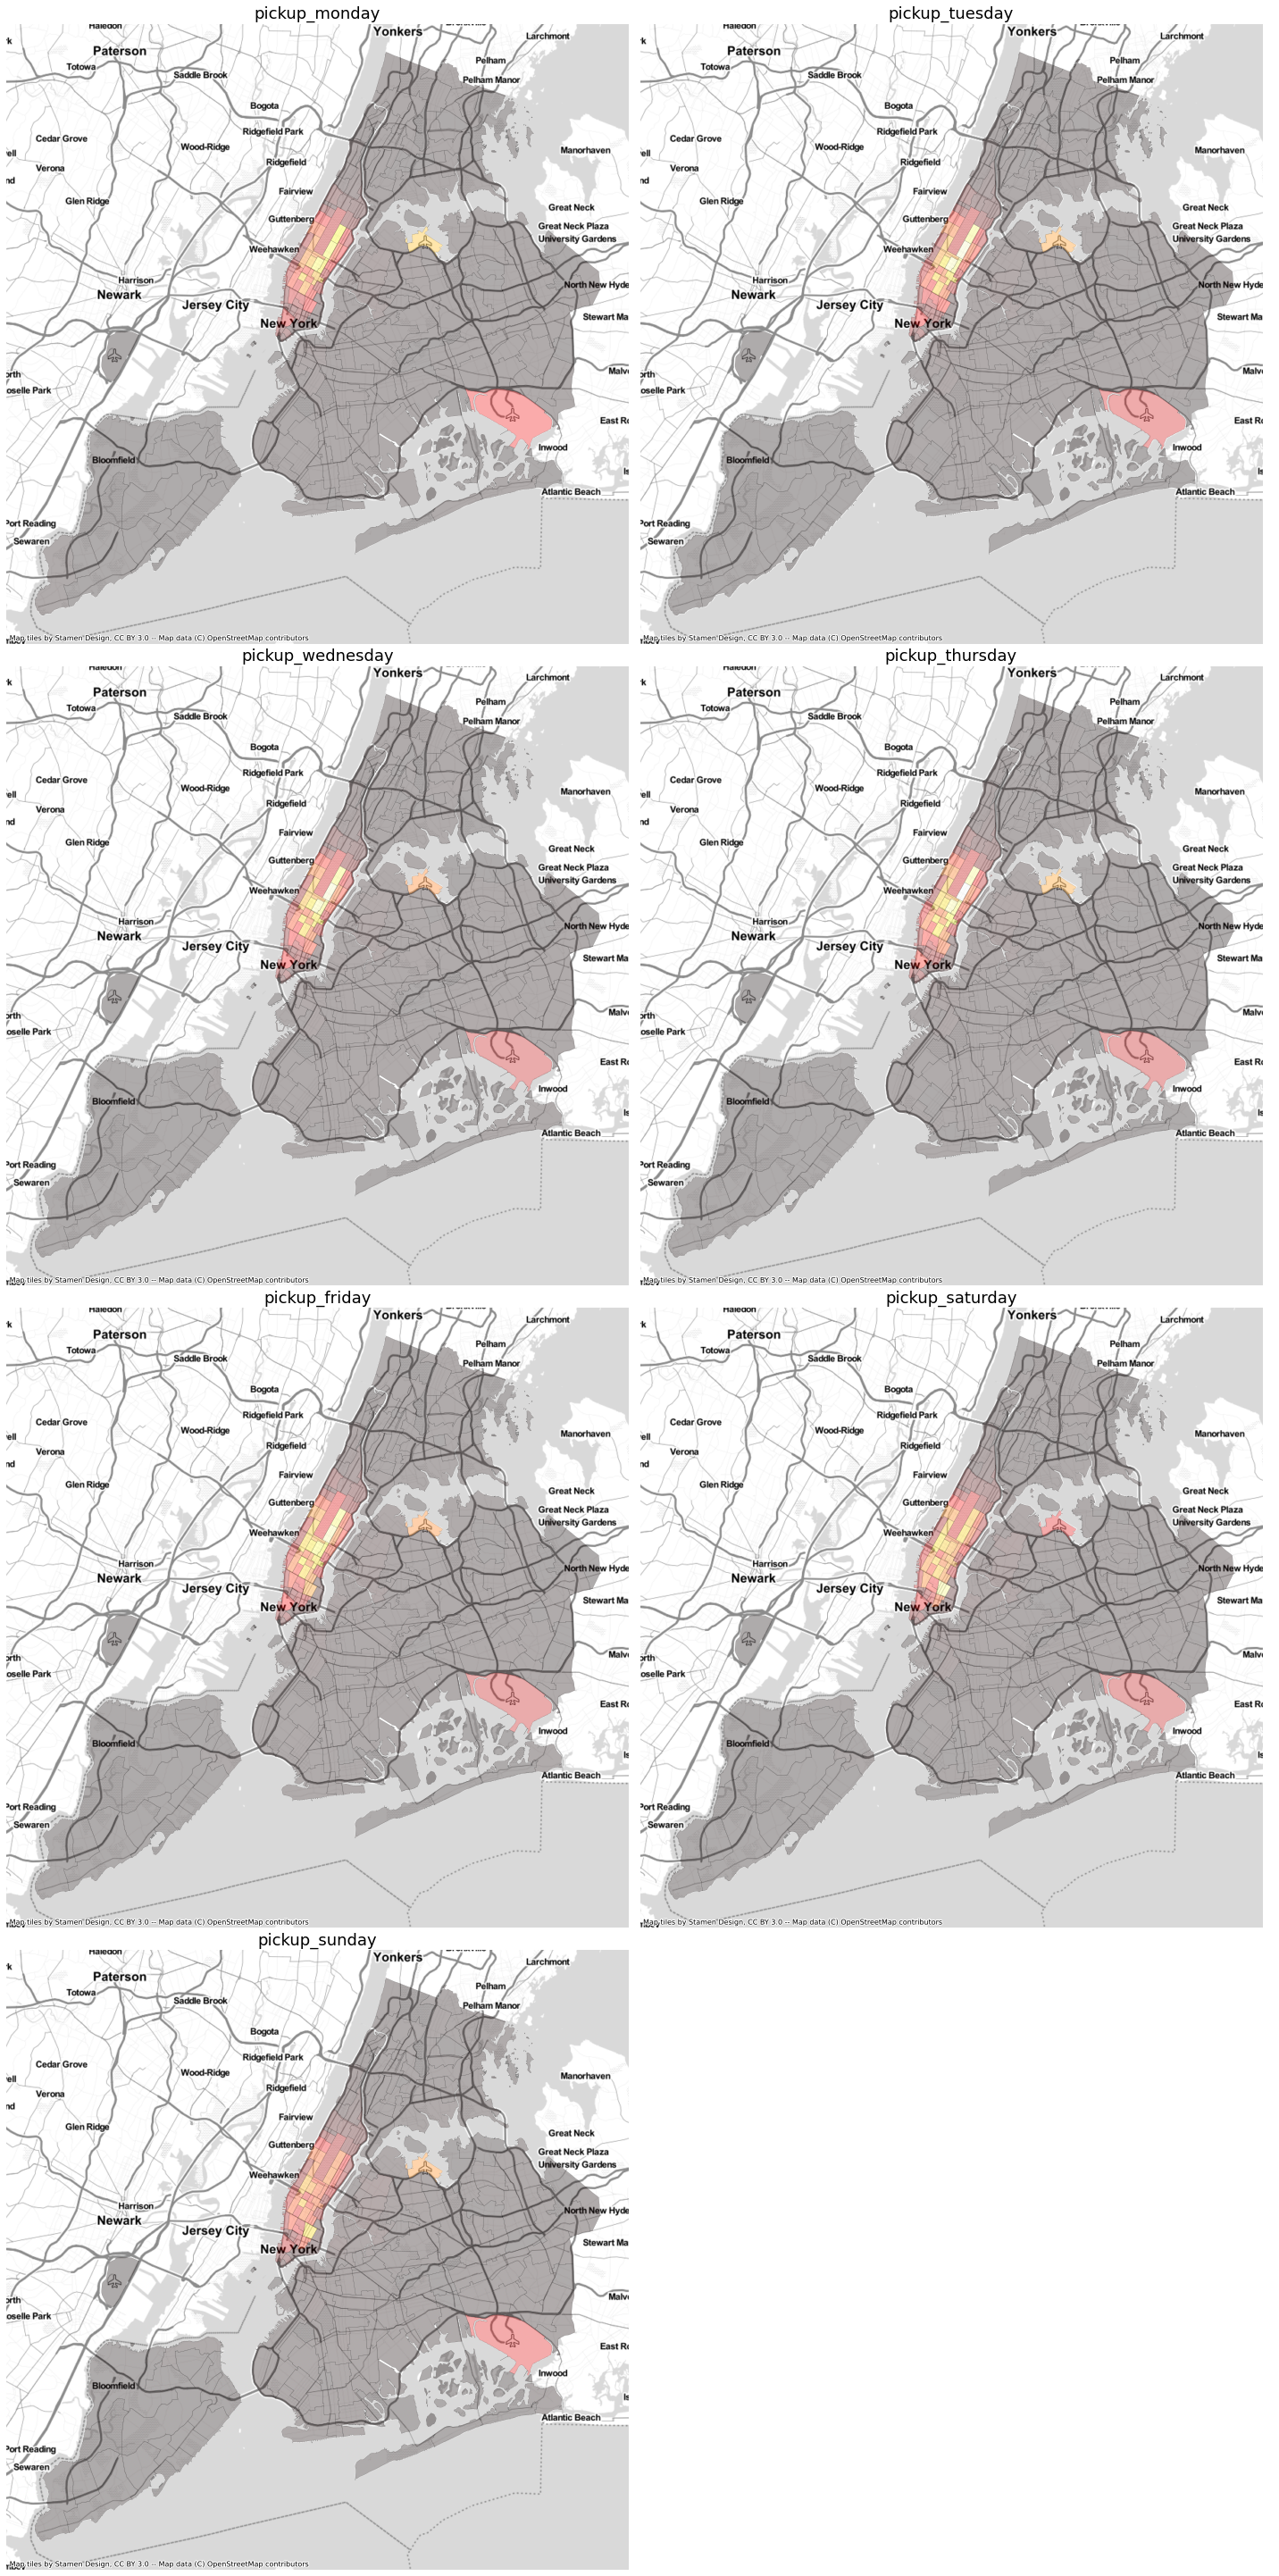

In [34]:
#
plot_map(
    zones_summary_df,
    [
        "pickup_monday",
        "pickup_tuesday",
        "pickup_wednesday",
        "pickup_thursday",
        "pickup_friday",
        "pickup_saturday",
        "pickup_sunday",
    ],
    [
        "pickup_monday",
        "pickup_tuesday",
        "pickup_wednesday",
        "pickup_thursday",
        "pickup_friday",
        "pickup_saturday",
        "pickup_sunday",
    ],
    nrows=4,
    ncols=2,
    legend=None,
    figsize=(20, 40),
)

In [ ]:
#
plot_map(
    daily_pickup_mean,
    daily_pickup_mean.columns[2:],
    to_title(daily_pickup_mean.columns[2:]),
    nrows=2,
    ncols=4,
    legend=None,
    figsize=(20, 10),
)

***
## Data Export